# Water Boiler Demo

In [1]:
import openmc
import water_boiler
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sol_temp=303.
sol_conc=0.299;
U_enrch=0.1467;
cr_wd = 0.1; # cm, distance the control rod is withdrawn from the core

material, geometry, tallies, settings = water_boiler.generate_model(sol_temp,
                                                                    sol_conc,
                                                                    U_enrch,cr_wd);

In [3]:
material.export_to_xml();
geometry.export_to_xml();
tallies.export_to_xml();
settings.export_to_xml();

In [4]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

       32/1    1.33285    1.35303 +/- 0.00700
       33/1    1.35387    1.35310 +/- 0.00644
       34/1    1.32949    1.35141 +/- 0.00619
       35/1    1.35665    1.35176 +/- 0.00578
       36/1    1.34313    1.35122 +/- 0.00543
       37/1    1.33161    1.35007 +/- 0.00523
       38/1    1.31621    1.34819 +/- 0.00528
       39/1    1.36561    1.34910 +/- 0.00508
       40/1    1.35919    1.34961 +/- 0.00484
       41/1    1.36625    1.35040 +/- 0.00467
       42/1    1.34138    1.34999 +/- 0.00447
       43/1    1.37834    1.35122 +/- 0.00445
       44/1    1.31944    1.34990 +/- 0.00446
       45/1    1.33521    1.34931 +/- 0.00432
       46/1    1.39066    1.35090 +/- 0.00444
       47/1    1.36508    1.35143 +/- 0.00431
       48/1    1.37174    1.35215 +/- 0.00421
       49/1    1.37216    1.35284 +/- 0.00412
       50/1    1.35530    1.35292 +/- 0.00399
       51/1    1.38001    1.35380 +/- 0.00395
       52/1    1.37945    1.35460 +/- 0.00391
       53/1    1.33839    1.35411 

In [5]:
material, geometry, tallies, settings = water_boiler.generate_model(sol_temp,
                                                                    sol_conc,U_enrch,
                                                                    cr_wd=76.);
material.export_to_xml();
geometry.export_to_xml();
tallies.export_to_xml();
settings.export_to_xml();

In [6]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

       33/1    1.37348    1.36542 +/- 0.00615
       34/1    1.30930    1.36142 +/- 0.00696
       35/1    1.33043    1.35935 +/- 0.00680
       36/1    1.35572    1.35912 +/- 0.00637
       37/1    1.34581    1.35834 +/- 0.00603
       38/1    1.39279    1.36025 +/- 0.00600
       39/1    1.37198    1.36087 +/- 0.00571
       40/1    1.36894    1.36127 +/- 0.00543
       41/1    1.38991    1.36264 +/- 0.00534
       42/1    1.33975    1.36160 +/- 0.00520
       43/1    1.38698    1.36270 +/- 0.00509
       44/1    1.36757    1.36290 +/- 0.00488
       45/1    1.37595    1.36343 +/- 0.00471
       46/1    1.37804    1.36399 +/- 0.00456
       47/1    1.36308    1.36395 +/- 0.00439
       48/1    1.37450    1.36433 +/- 0.00424
       49/1    1.31626    1.36267 +/- 0.00442
       50/1    1.38458    1.36340 +/- 0.00433
       51/1    1.30965    1.36167 +/- 0.00453
       52/1    1.39095    1.36259 +/- 0.00448
       53/1    1.38641    1.36331 +/- 0.00440
       54/1    1.35337    1.36301 

In [7]:
sp_filename = "statepoint." + str(settings.batches) + ".h5"
sp = openmc.StatePoint(sp_filename);

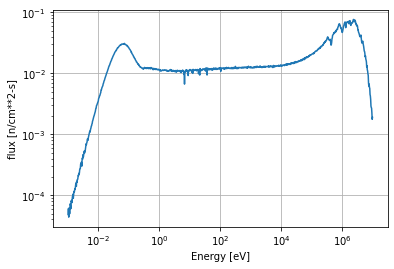

In [8]:
flux = sp.get_tally(name='flux');
flux_df = flux.get_pandas_dataframe();
flux_vals = flux_df['mean'].to_numpy();

N = 1001;
energy_bins = np.logspace(-3,7,num=N);
energy_x = 0.5*(energy_bins[0:-1] + energy_bins[1:]);

plt.loglog(energy_x,flux_vals);
plt.grid();
plt.xlabel('Energy [eV]');
plt.ylabel('flux [n/cm**2-s]');

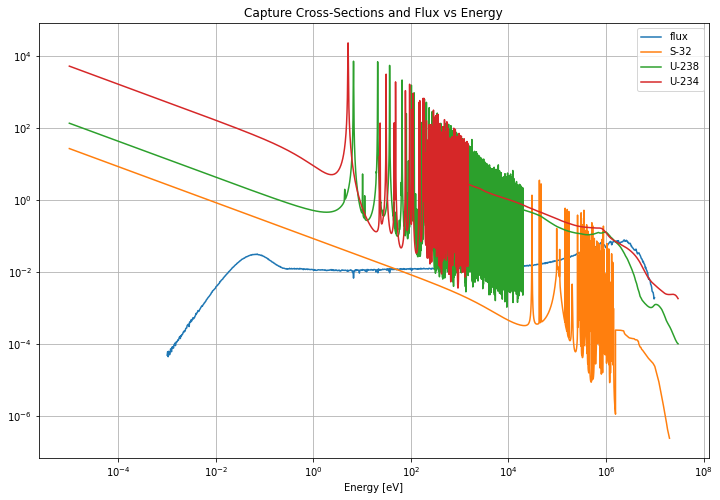

In [9]:
OMC_DATA = "/home/sblair/OMC_DATA/endfb71_hdf5"

u238_path = OMC_DATA + "/U238.h5";
u238 = openmc.data.IncidentNeutron.from_hdf5(u238_path);
u238_capture = u238[102];

s32_path = OMC_DATA + "/S32.h5";
s32 = openmc.data.IncidentNeutron.from_hdf5(s32_path);
s32_capture = s32[102];

u234_path = OMC_DATA + "/U234.h5";
u234 = openmc.data.IncidentNeutron.from_hdf5(u234_path);
u234_capture = u234[102];

plt.rcParams['figure.figsize']=[12,8];
plt.loglog(energy_x,flux_vals,label='flux');
plt.loglog(s32_capture.xs['294K'].x,s32_capture.xs['294K'].y,label='S-32');
plt.loglog(u238_capture.xs['294K'].x,u238_capture.xs['294K'].y,label='U-238');
plt.loglog(u234_capture.xs['294K'].x,u234_capture.xs['294K'].y,label='U-234');
plt.grid();
plt.legend();
plt.xlabel('Energy [eV]');
plt.title('Capture Cross-Sections and Flux vs Energy');

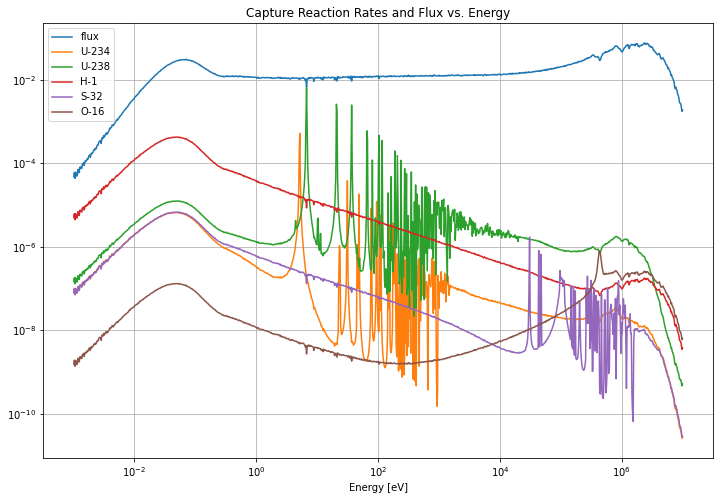

In [10]:
capture_by_nuclide = sp.get_tally(name='capture_by_nuclide');
capture_by_nuclide_df = capture_by_nuclide.get_pandas_dataframe();

capture_U234 = capture_by_nuclide_df[capture_by_nuclide_df['nuclide']=='U234']['mean'].to_numpy();
capture_U238 = capture_by_nuclide_df[capture_by_nuclide_df['nuclide']=='U238']['mean'].to_numpy();
capture_H1 = capture_by_nuclide_df[capture_by_nuclide_df['nuclide']=='H1']['mean'].to_numpy();
capture_S32 = capture_by_nuclide_df[capture_by_nuclide_df['nuclide']=='S32']['mean'].to_numpy();
capture_O16 = capture_by_nuclide_df[capture_by_nuclide_df['nuclide']=='O16']['mean'].to_numpy();

plt.rcParams['figure.figsize']=[12,8];
plt.loglog(energy_x,flux_vals,label='flux');
plt.loglog(energy_x,capture_U234,label='U-234');
plt.loglog(energy_x,capture_U238,label='U-238');
plt.loglog(energy_x,capture_H1,label='H-1');
plt.loglog(energy_x,capture_S32,label='S-32');
plt.loglog(energy_x,capture_O16,label='O-16');
plt.grid();
plt.legend();
plt.xlabel('Energy [eV]');
plt.title('Capture Reaction Rates and Flux vs. Energy');